In [25]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Fetch Dataframes

In [26]:
repo_a = pd.read_csv("../data_files/repo_a.csv")
repo_b = pd.read_csv("../data_files/repo_b.csv")
repo_c = pd.read_csv("../data_files/repo_c.csv")


### Interquartile Range

In [27]:
Q1 = repo_c['General: Count'].quantile(0.25)
Q3 = repo_c['General: Count'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

repo_c_filtered = repo_c[(repo_c['General: Count'] >= lower_bound) & (repo_c['General: Count'] <= upper_bound)]

### Top 20 Items by Value Counts

/var/folders/yr/gmmc3xcx5xg406qfnj2bnx340000gn/T/ipykernel_12178/3897261892.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


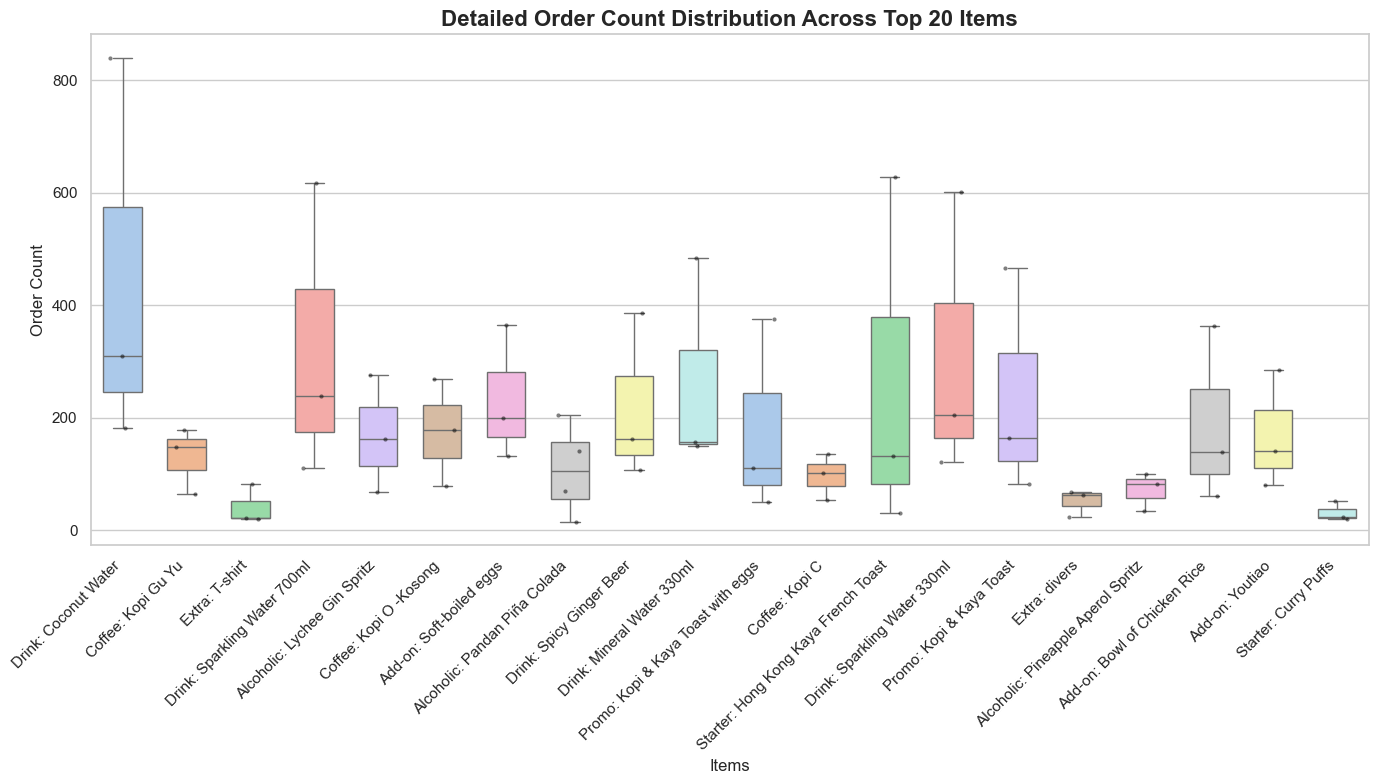

In [28]:
# Get the top 20 items by count order
top20_items = repo_c['Item'].value_counts().head(20).index

# Filter the dataset for the top 20 items
repo_c_top20 = repo_c_filtered[repo_c_filtered['Item'].isin(top20_items)]


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Base box plot
sns.boxplot(
    x = 'Item',
    y = 'General: Count',
    data = repo_c_top20,
    palette = 'pastel',
    width = 0.6,
    fliersize = 0  # hide outliers, since stripplot shows them
)

# Overlay strip plot
sns.stripplot(
    x = 'Item',
    y = 'General: Count',
    data = repo_c_top20,
    color = 'black',
    alpha = 0.5,
    jitter = 0.2,
    size = 3
)

# Title and axis labels
plt.title("Detailed Order Count Distribution Across Top 20 Items", fontsize=16, fontweight='bold')
plt.xlabel("Items", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Items by Average

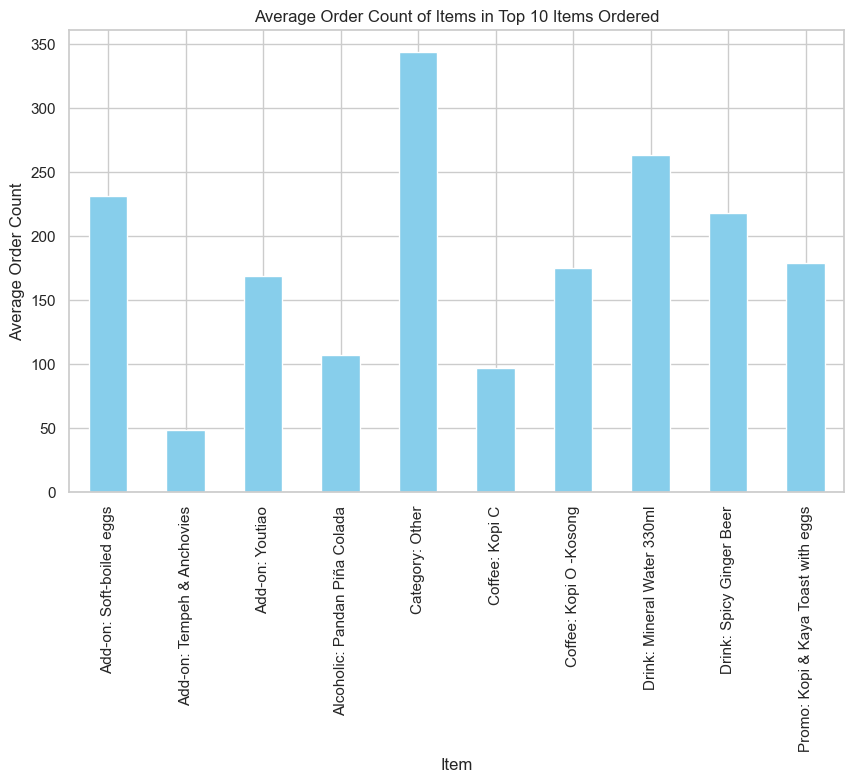

In [29]:
# Get the top 10 items by order count
top10_items = repo_c_filtered['Item'].value_counts().head(10).index

# Calculate the average price for each top 10 category
avg_price_by_category = repo_c_filtered[repo_c_filtered['Item'].isin(top10_items)] \
    .groupby('Item')['General: Count'].mean()

# Plot the bar chart
avg_price_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Average Order Count of Items in Top 10 Items Ordered")
plt.xlabel("Item")
plt.ylabel("Average Order Count")
plt.xticks(rotation=90)
plt.show()

### QQ Plot

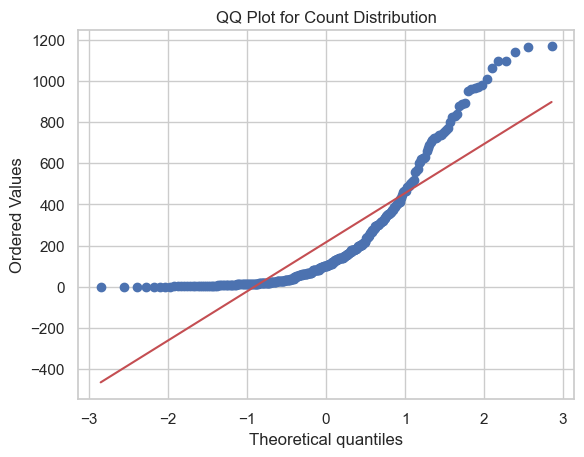

In [30]:
# QQ plot for order count distribution
stats.probplot(repo_c_filtered['General: Count'], dist="norm", plot=plt)
plt.title("QQ Plot for Count Distribution")
plt.show()

### Frequency Table

In [31]:
# Generate frequency table for 'Item'
item_freq = repo_c['Item'].value_counts()

# Display top 5 most ordered items
top_5_item = item_freq.head(5)
print(top_5_item)

Item
Alcoholic: Pandan Piña Colada         4
Promo: Kopi & Kaya Toast with eggs    3
Add-on: Bowl of Chicken Rice          3
Alcoholic: Pineapple Aperol Spritz    3
Extra: divers                         3
Name: count, dtype: int64


### Bar chart plot for Top 5 Items

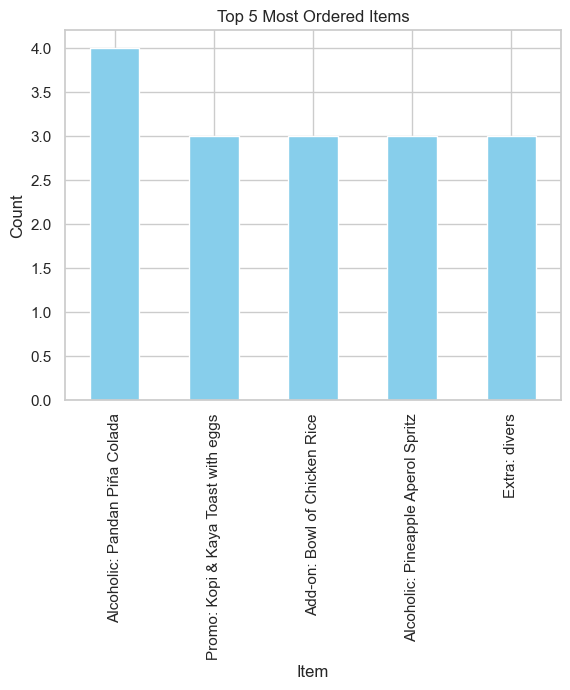

In [32]:
# Plot the bar chart for top 5 items
item_freq.head(5).plot(kind='bar', color='skyblue')
plt.title("Top 5 Most Ordered Items")
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()

### Distribution of Order Count

In [33]:
mean_count = repo_c['General: Count'].mean()
median_count = repo_c['General: Count'].median()
mode_count = repo_c['General: Count'].mode()[0]  # mode() returns a series, so we take the first mode if multiple

print(f"Mean count: {mean_count}, Median price: {median_count}, Mode price: {mode_count}")

Mean count: 840.7786885245902, Median price: 139.5, Mode price: 1.0


In [34]:
variance = repo_c['General: Count'].var()
std_dev = repo_c['General: Count'].std()
count_range = repo_c['General: Count'].max() - repo_c['General: Count'].min()
iqr = repo_c['General: Count'].quantile(0.75) -repo_c['General: Count'].quantile(0.25)

print(f"Variance: {variance}, Standard Deviation: {std_dev}")
print(f"Range: {count_range}, Interquartile Range (IQR): {iqr}")

Variance: 9256250.808421278, Standard Deviation: 3042.408718174019
Range: 38094.0, Interquartile Range (IQR): 471.25


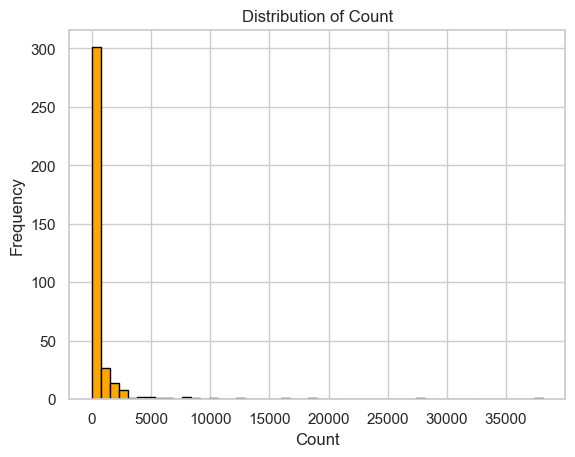

In [35]:
repo_c['General: Count'].plot(kind='hist', bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Count")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()